**Predicción de precio de coches de segunda mano** 
El objetivo de este proyecto es crear un predictor de precios de coches de segunda mano lo más fiable posible, así si queremos vender nuestro viejo coche o comprar  podemos predecir su precio ideal.
**¿Cómo lo he creado?**
Mediante un data set de muestra en el que tenemos la venta de coches de segunda mano, clasificado por precios, kilómetros, color, tipo de combustible, fecha de venta, etc.
Además de eso creo que un punto muy importante hoy en día es el precio de los combustibles, no se venden igual los vehículos de Diesel antes que en estos momentos. Por eso he decidido añadir el precio de los combustibles por meses.



In [1]:
#Básicos

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


#Visualización
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt


#Modelos
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost

In [2]:
ruta_coches_usados=r"C:\Users\Susana Ruiz\Documents\curso\machine learning\data\raw_files\coches_segunda_mano.csv"
coches_usados = pd.read_csv(ruta_coches_usados)

In [3]:
#Elimino las columnas que son interesantes para el análisis.
def borrar(df,columnas_a_eliminar):
    '''elimina las columnas de un dataframe,meter nombre de las columnas en una lista'''

    df.drop(columnas_a_eliminar,axis=1,inplace=True)
    return df
    
    



columnas=['url','company','price_financed','photos',
                    'dealer','country','shift','insert_date','version']
coches_usados = borrar(coches_usados,columnas)




In [4]:

def cambio_de_nombre(df,columnas_a_renonbrar):
    '''renombras las columnas, meter los nombres en una lista'''
    
                    
    df.set_axis(columnas_a_renonbrar, axis=1,inplace=True)
    return df


columnas=['Marca', 'Modelo','precio','Combustible',
                        'Año_del_vehiculo','kilometros','Caballos','puertas','color_coche',
                        'profesional','Comunidad_autonoma','Año_de_venta']
coches_usados = cambio_de_nombre(coches_usados,columnas)




In [5]:
def provincias(df,columna):

    ''' cambia el nombre de las provincias en comunidades autonomas, meter nombre de columna deseada'''

    for i in df[columna]:
        if i == 'Almería'or i == 'Granada'or i =='Córdoba' or i== 'Jaén' or i =='Sevilla' or i== 'Málaga' or i =='Cádiz' or i== 'Huelva':
            df[columna].replace(i,'Andalucía',inplace=True)
        elif i== 'Huesca' or i =='Zaragoza' or i=='Teruel':
            df[columna].replace(i,'Aragón',inplace=True)
        elif i=='Toledo' or i =='Guadalajara' or i=='Albacete' or i == 'Cuenca' or i =='Ciudad Real':
            df[columna].replace(i,'Castilla la Mancha',inplace=True)
        elif i=='León' or i =='Palencia' or i=='Salamanca' or i == 'Burgos' or i == 'Zamora' or i =='Valladolid' or i =='Soria' or i =='Segovia' or i == 'Ávila':
            df[columna].replace(i,'Castilla y León',inplace=True)
        elif i=='Barcelona' or i == 'Tarragona' or i =='Lérida' or i=='Gerona' or i=='Lleida' or i=='Girona':
            df[columna].replace(i,'Cataluña',inplace=True)
        elif i =='Caceres' or i =='Badajoz' or i =='Cáceres':
            df[columna].replace(i,'Extremadura',inplace=True)
        elif i== 'Álava' or i =='Guipúzcoa' or i =='Vizcaya':
            df[columna].replace(i,'País Vasco',inplace=True)
        elif i=='Castellón' or i =='Valencia' or i =='Alicante':
            df[columna].replace(i,'columna',inplace=True)
        elif i =='La coruña' or i== 'Lugo' or i=='Ourense' or i=='Pontevedra'or i == 'A Coruña' or i=='Orense':
            df[columna].replace(i,'Galicia',inplace=True)
        elif i == 'Tenerife' or i == 'Las Palmas':
            df[columna].replace(i,'Islas Canarias',inplace=True)
        elif i == 'Baleares':
            df[columna].replace(i,'Islas_Baleares',inplace=True)
        elif i == 'Madrid':
            df[columna].replace(i,'Madrid',inplace=True)
        elif i == 'Madrid':
            df[columna].replace(i,'Navarra',inplace=True)
        elif i == 'Madrid':
            df[columna].replace(i,'Asturias',inplace=True)
        elif i == 'La Rioja':
            df[columna].replace(i,'La rioja',inplace=True)                                              
        elif i == 'Murcia':
            df[columna].replace(i,'Murcia',inplace=True) 
        elif i == 'Cantabria':
            df[columna].replace(i,'Cantabria',inplace=True)

    return df

coches_usados = provincias(coches_usados,'Comunidad_autonoma')



In [6]:
def borrar_filas(df,columna,palabras):
    '''borra filas que contengan las palabras(meter en lista)
    de la columna que le digas'''
    df_copy = df.copy() 


    for index,row in df_copy.iterrows():
        if row[columna] in palabras :
            df_copy=df_copy.drop(index)
    return df_copy
            
columna='Comunidad_autonoma'
palabras=['Ceuta','Melilla']
coches_usados = borrar_filas(coches_usados,columna,palabras)

In [7]:
def pasar_a_string(df,columna):
    '''funcion que convierte columnas boleanas en string'''
    df[columna]=df[columna].astype(str)
    return df
columna='profesional'
coches_usados = pasar_a_string(coches_usados,columna)

In [8]:
#borro los coches profesionales

columna='profesional'
palabras='True'
coches_usados = borrar_filas(coches_usados,columna,palabras)


In [9]:
def divide_fecha(df,columna):
    ''' divine una columna en 3 separadas por -
    esta pensado para fechas, tiene que ser en formato str
    ejemplo 2020-11-07 17:25:28'''
    df[['año_Venta', 'Mes_Venta','dia']] = df[columna].str.split('-',3,expand=True)
    return df
    
columna='Año_de_venta'
coches_usados = divide_fecha(coches_usados,columna)
coches_usados['Mes_Venta'].unique()


array(['12', '11', '01', '10', '09', '07', '08', '02', '05', '06', '03',
       '04'], dtype=object)

In [10]:
#borro mas columnas


columnas=['Año_de_venta','dia']
coches_usados = borrar(coches_usados,columnas)

coches_usados['Mes_Venta'].unique()

array(['12', '11', '01', '10', '09', '07', '08', '02', '05', '06', '03',
       '04'], dtype=object)

In [11]:
def borrar_null(df,columna):
    '''funcion que convierte columnas boleanas en string'''
    df = df.dropna(subset=columna)
    return df
columna=['Comunidad_autonoma','Caballos','Marca']
coches_usados = borrar_null(coches_usados,columna)
coches_usados['Mes_Venta'].unique()

array(['12', '11', '10', '09', '01', '08', '02', '07', '05', '03'],
      dtype=object)

In [12]:
def fillna_mode_by_group(df, column_to_fillna, column_to_group):
    """
    rellena los valores faltantes con la moda de su tipo en una columna distinta
    """
    groups = df.groupby(column_to_group)
    for group_name, group_data in groups:
        non_missing_values = group_data[column_to_fillna].dropna().unique()
        if len(non_missing_values) > 1:
            mode_value = group_data[column_to_fillna].mode().values[0]
            df.loc[group_data.index, column_to_fillna] = group_data[column_to_fillna].fillna(mode_value)
    return df


coches_usados = fillna_mode_by_group(coches_usados, 'color_coche', 'Modelo')

In [13]:
coches_usados['Mes_Venta'].unique()

array(['12', '11', '10', '09', '01', '08', '02', '07', '05', '03'],
      dtype=object)

In [14]:

palabras=['IVECO-PEGASO','UMM','IVECO']
columna='Marca'

coches_usados = borrar_filas(coches_usados,columna,palabras)
coches_usados['Mes_Venta'].unique()

array(['12', '11', '10', '09', '01', '08', '02', '07', '05', '03'],
      dtype=object)

In [15]:


#nos vamos a quedar solo con el primer color

def primera_palabra(cadena):

    '''se queda con la primera palabra de una frase'''
    if isinstance(cadena, str):
        partes = cadena.split(" ")
        return partes[0]
    else:
        return None

coches_usados['color_coche']=coches_usados['color_coche'].apply(primera_palabra)



In [16]:
coches_usados['color_coche'].unique()

array(['Blanco', 'Azul', 'Granate', 'Gris', 'Negro', 'Rojo', 'Beige',
       'Amarillo', 'Verde', 'Naranja', 'Marrón', 'Violeta', 'Rosa', None],
      dtype=object)

In [17]:
ruta_gasolina=r"C:\Users\Susana Ruiz\Documents\curso\machine learning\data\processed_files\tabla_gasolina.csv"
tabla_gasolina = pd.read_csv(ruta_gasolina)

In [18]:

columna=['Diesel','Super_95']
tabla_gasolina = pasar_a_string(tabla_gasolina,columna)

In [19]:
def pasar_a_float(df,columna):
    '''funcion que convierte columnas float'''
    df[columna]=df[columna].astype(float)
    return df
columna=['Diesel','Super_95']
tabla_gasolina = pasar_a_float(tabla_gasolina,columna)

In [20]:
coches_usados = borrar(coches_usados,'profesional')

In [21]:
def pasar_a_int(df,columna):
    '''funcion que convierte columnas int'''
    df[columna]=df[columna].astype(int)
    return df
columna=['Mes_Venta','año_Venta']

coches_usados = pasar_a_int(coches_usados,columna)


In [22]:
columna1=['Mes','Año']
tabla_gasolina = pasar_a_int(tabla_gasolina,columna1)

In [23]:
#creo una nueva columna que se llame unidades para poder sumar los vechilos
def anañadir_columna(df,nombre_colum,loque_añado):
    df[nombre_colum]=loque_añado
    return df

coches_usados=anañadir_columna(coches_usados,'Unidad',1)

In [24]:
def unir_dataframes(df1, df2, how,left_on, right_on):
    '''funcion que hace un marge con 2 columnas
    pudiendo elegir las columnas de union
    y el como'''
    analisis = pd.merge(df1, df2, how=how,left_on=left_on, right_on=right_on)
    return analisis


analisis = unir_dataframes(coches_usados, tabla_gasolina,'inner',['año_Venta','Mes_Venta'],['Año','Mes'])

In [25]:
def unir_columnas(df,columna_nueva ,columna_vieja1,columna_vieja2,sep):

    ''' esta funcion uni columnas string 
    con este separador que le indiques'''
    df[columna_nueva]=df[columna_vieja1].str.cat(df[columna_vieja2],sep)
    return df

analisis=unir_columnas(analisis,'marca_modelo','Marca','Modelo',' ')

In [26]:
analisis.dtypes

def pasar_a_str(df,columna):
    '''funcion que convierte columnas int'''
    df[columna]=df[columna].astype(str)
    return df
columna=['Mes_Venta','año_Venta']

analisis = pasar_a_str(analisis,columna)

In [27]:
analisis.dtypes

Marca                  object
Modelo                 object
precio                  int64
Combustible            object
Año_del_vehiculo      float64
kilometros              int64
Caballos              float64
puertas                 int64
color_coche            object
Comunidad_autonoma     object
año_Venta              object
Mes_Venta              object
Unidad                  int64
Año                     int32
Mes                     int32
Super_95              float64
Diesel                float64
marca_modelo           object
dtype: object

In [28]:

def unir_columnas(df,columna_nueva ,columna_vieja1,columna_vieja2,sep):

    ''' esta funcion uni columnas string 
    con este separador que le indiques'''
    df[columna_nueva]=df[columna_vieja1].str.cat(df[columna_vieja2],sep)
    return df

analisis=unir_columnas(analisis,'Fecha','Mes_Venta','año_Venta','/')



In [29]:
def convert_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df

analisis = convert_to_datetime(analisis, 'Fecha')

**pequeño analisis**

In [30]:
#¿Cuál es el top 5 de las marcas de coches más vendidas?

n = 5
top5=analisis['Marca'].value_counts()[:n].index.tolist()

top5dt=analisis[analisis['Marca'].isin(top5)].groupby(['Marca'])['Unidad'].sum().reset_index()
top5dt.sort_values(by=['Unidad'], inplace=True, ascending=False)


fig = px.bar(top5dt, x='Marca', y='Unidad')
fig.show()

In [31]:
#¿Cuál es el combustible mas vendido por comunidades?


fig2 = px.histogram(analisis, x='Comunidad_autonoma', y='Unidad', color='Combustible',
                    barmode='group')
fig2.show()


In [32]:
#Tras ver los resultados, me he preguntado¿Los coches Diesel son más baratos?

dfdisel=analisis.groupby('Combustible')['precio'].median().reset_index().sort_values('precio',ascending=False)

fig9 = px.bar(dfdisel,x='Combustible',
            y='precio',
            color='Combustible',
            title='Precio medio por Combustible de coches',text_auto='.2s')

fig9.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig9.show()

In [33]:
#¿Está el precio relacionado con los kilometros recorridos?Para comprobarlo usaremos el modelo más usado.


marca_pais=analisis.groupby(['marca_modelo'])['Unidad'].sum().reset_index().sort_values('Unidad',ascending=False).head(10)

fig = px.pie(marca_pais, values='Unidad', names='marca_modelo', title='Coches más vendidos')
fig.show()

#vemos que es el bmv serie 3. Ahora vamos a ver su precio en función de los kilometros recorreidos


filtro_bmv = analisis['marca_modelo'] == 'BMW Serie 3'

bmw=analisis[filtro_bmv]





fig = px.scatter(bmw, x="kilometros", y="precio")
fig.show()

#vemos que la tendendecia es cuantos más kilometros, más barato es el coche.

In [34]:
#¿Cómo es la venta por colores?
colores=analisis.groupby(['color_coche'])['Unidad'].sum().reset_index().sort_values('Unidad',ascending=False)

fig = px.bar(colores, x='color_coche', y='Unidad',color='color_coche',color_discrete_map={'Gris':'grey',
                                 'Negro':'black',
                                 'Blanco':'floralwhite','Azul':'deepskyblue',
                                 'Rojo':'red',
                                 'Verde':'green',
                                 'Beige':'beige','Marrón':'saddlebrown',
                                 
                                 'Granate':'magenta',
                                 'Amarillo':'yellow',
                                 'Naranja':'orange',
                                 'Violeta':'darkviolet',
                                 'Rosa':'deeppink',
                                 })
fig.show()

In [35]:
#¿Los coches de 2 puertas tienen más caballos?, ¿hay correlación?


caballos=analisis.groupby(['Caballos','puertas'])['Unidad'].sum().reset_index().sort_values('Unidad',ascending=False)

fig = px.scatter(caballos, x="Caballos", y="Unidad", color='puertas')
fig.show()

#aparentemente no

In [36]:
analisis

,Marca,Modelo,precio,Combustible,Año_del_vehiculo,kilometros,Caballos,puertas,color_coche,Comunidad_autonoma,año_Venta,Mes_Venta,Unidad,Año,Mes,Super_95,Diesel,marca_modelo,Fecha
0,HONDA,Civic,8200,Diésel,2012.0,203000,150.0,5,Blanco,Cataluña,2020,12,1,2020,12,1.176667,1.060,HONDA Civic,2020-12-01
1,NISSAN,NOTE,6300,Gasolina,2016.0,77000,80.0,5,Blanco,Cataluña,2020,12,1,2020,12,1.176667,1.060,NISSAN NOTE,2020-12-01
2,SEAT,Ibiza,11400,Gasolina,2017.0,28000,110.0,5,Negro,Cataluña,2020,12,1,2020,12,1.176667,1.060,SEAT Ibiza,2020-12-01
3,NISSAN,NOTE,7900,Gasolina,2015.0,54200,80.0,5,Blanco,Galicia,2020,12,1,2020,12,1.176667,1.060,NISSAN NOTE,2020-12-01
4,PEUGEOT,406,800,Gasolina,1998.0,120000,135.0,4,Rojo,Castilla la Mancha,2020,12,1,2020,12,1.176667,1.060,PEUGEOT 406,2020-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,FIAT,500,9500,Gasolina,2016.0,64999,69.0,3,Blanco,Madrid,2019,3,1,2019,3,1.267500,1.230,FIAT 500,2019-03-01
9043,MITSUBISHI,Lancer,6500,Diésel,2011.0,200000,140.0,4,Gris,Andalucía,2020,3,1,2020,3,1.224000,1.126,MITSUBISHI Lancer,2020-03-01
9044,FORD,Fiesta,4500,Gasolina,2006.0,149999,150.0,3,Blanco,Islas Canarias,2017,11,1,2017,11,1.235000,1.135,FORD Fiesta,2017-11-01
9045,VOLVO,460,6000,Gasolina,1993.0,109999,90.0,4,None,País Vasco,2017,5,1,2017,5,1.220000,1.090,VOLVO 460,2017-05-01


In [37]:
#como hay muchas marcas, vamos a dividirlas en grupos,¿como lo podemos hacer?
df = px.data.tips()
fig = px.box(analisis, x="Marca", y="precio")
fig.show()

'''en el grafico se puede apreciar  que se pueden divir en 3 o en 4 grupos por tipo de precio'''

'en el grafico se puede apreciar  que se pueden divir en 3 o en 4 grupos por tipo de precio'

In [38]:
grupos=analisis.groupby(['Marca'])['precio'].median().reset_index().round(2).sort_values('precio')


fig = px.bar(grupos, x='Marca', y='precio')
fig.show()

#esta es el relación entre marcas y precio, ahora si lo podemos divir en 3 gamas
#gama alta, media y baja

In [39]:
1#los creamos en función de su preciom caballos y marca


def hacer_cluster(df):
    from sklearn.cluster import KMeans
    df['marca_num'] = pd.factorize(df['Marca'])[0]
    precios = df[['precio', 'Caballos', 'marca_num']]
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(precios)
    df['cluster'] = kmeans.labels_
    return df
analisis = hacer_cluster(analisis)


In [40]:

analisis = borrar(analisis,'Marca')

In [41]:
def quitar_outliers(df,cols):   



# Calculate quantiles and IQR
    Q1 = analisis[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
    Q3 = analisis[cols].quantile(0.75)
    IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
    condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df


cols = ['precio','Combustible', 'Año_del_vehiculo', 'kilometros','Caballos', 'puertas',

'Mes_Venta','cluster']
analisis = quitar_outliers(analisis,cols)

In [43]:
analisis

,Modelo,precio,Combustible,Año_del_vehiculo,kilometros,Caballos,puertas,color_coche,Comunidad_autonoma,año_Venta,Mes_Venta,Unidad,Año,Mes,Super_95,Diesel,marca_modelo,Fecha,marca_num,cluster
0,Civic,8200,Diésel,2012.0,203000,150.0,5,Blanco,Cataluña,2020,12,1,2020,12,1.176667,1.060,HONDA Civic,2020-12-01,0,0
1,NOTE,6300,Gasolina,2016.0,77000,80.0,5,Blanco,Cataluña,2020,12,1,2020,12,1.176667,1.060,NISSAN NOTE,2020-12-01,1,0
2,Ibiza,11400,Gasolina,2017.0,28000,110.0,5,Negro,Cataluña,2020,12,1,2020,12,1.176667,1.060,SEAT Ibiza,2020-12-01,2,2
3,NOTE,7900,Gasolina,2015.0,54200,80.0,5,Blanco,Galicia,2020,12,1,2020,12,1.176667,1.060,NISSAN NOTE,2020-12-01,1,0
4,406,800,Gasolina,1998.0,120000,135.0,4,Rojo,Castilla la Mancha,2020,12,1,2020,12,1.176667,1.060,PEUGEOT 406,2020-12-01,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,500,9500,Gasolina,2016.0,64999,69.0,3,Blanco,Madrid,2019,3,1,2019,3,1.267500,1.230,FIAT 500,2019-03-01,7,0
9043,Lancer,6500,Diésel,2011.0,200000,140.0,4,Gris,Andalucía,2020,3,1,2020,3,1.224000,1.126,MITSUBISHI Lancer,2020-03-01,18,0
9044,Fiesta,4500,Gasolina,2006.0,149999,150.0,3,Blanco,Islas Canarias,2017,11,1,2017,11,1.235000,1.135,FORD Fiesta,2017-11-01,9,0
9045,460,6000,Gasolina,1993.0,109999,90.0,4,None,País Vasco,2017,5,1,2017,5,1.220000,1.090,VOLVO 460,2017-05-01,5,0


In [ ]:
def dummies(df,columnas,pre):
    df = pd.get_dummies(df, columns=columnas, prefix=pre)
    return df
columnas=['Combustible']
prefijo='combus'
analisis=dummies(analisis,columnas,prefijo)



In [ ]:
analisis

,Modelo,precio,Año_del_vehiculo,kilometros,Caballos,puertas,color_coche,Comunidad_autonoma,año_Venta,Mes_Venta,...,Fecha,marca_num,cluster,combus_Diésel,combus_Eléctrico,combus_Gas licuado (GLP),combus_Gas natural (CNG),combus_Gasolina,combus_Híbrido,combus_Híbrido enchufable
0,Civic,8200,2012.0,203000,150.0,5,Blanco,Cataluña,2020,12,...,2020-12-01,0,0,1,0,0,0,0,0,0
1,NOTE,6300,2016.0,77000,80.0,5,Blanco,Cataluña,2020,12,...,2020-12-01,1,0,0,0,0,0,1,0,0
2,Ibiza,11400,2017.0,28000,110.0,5,Negro,Cataluña,2020,12,...,2020-12-01,2,1,0,0,0,0,1,0,0
3,NOTE,7900,2015.0,54200,80.0,5,Blanco,Galicia,2020,12,...,2020-12-01,1,0,0,0,0,0,1,0,0
4,406,800,1998.0,120000,135.0,4,Rojo,Castilla la Mancha,2020,12,...,2020-12-01,3,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,500,9500,2016.0,64999,69.0,3,Blanco,Madrid,2019,3,...,2019-03-01,7,0,0,0,0,0,1,0,0
9043,Lancer,6500,2011.0,200000,140.0,4,Gris,Andalucía,2020,3,...,2020-03-01,18,0,1,0,0,0,0,0,0
9044,Fiesta,4500,2006.0,149999,150.0,3,Blanco,Islas Canarias,2017,11,...,2017-11-01,9,0,0,0,0,0,1,0,0
9045,460,6000,1993.0,109999,90.0,4,None,País Vasco,2017,5,...,2017-05-01,5,0,0,0,0,0,1,0,0


In [ ]:
def factorizar(df, columna):
    df[columna] = pd.factorize(df[columna])[0]
    return df

In [ ]:
analisis = factorizar(analisis, 'Comunidad_autonoma')

analisis = factorizar(analisis, 'color_coche')


In [ ]:
#borro una columna de cada getdumie


analisis = borrar(analisis,'combus_Híbrido enchufable')



In [ ]:
analisis

,Modelo,precio,Año_del_vehiculo,kilometros,Caballos,puertas,color_coche,Comunidad_autonoma,año_Venta,Mes_Venta,...,marca_modelo,Fecha,marca_num,cluster,combus_Diésel,combus_Eléctrico,combus_Gas licuado (GLP),combus_Gas natural (CNG),combus_Gasolina,combus_Híbrido
0,Civic,8200,2012.0,203000,150.0,5,0,0,2020,12,...,HONDA Civic,2020-12-01,0,0,1,0,0,0,0,0
1,NOTE,6300,2016.0,77000,80.0,5,0,0,2020,12,...,NISSAN NOTE,2020-12-01,1,0,0,0,0,0,1,0
2,Ibiza,11400,2017.0,28000,110.0,5,1,0,2020,12,...,SEAT Ibiza,2020-12-01,2,1,0,0,0,0,1,0
3,NOTE,7900,2015.0,54200,80.0,5,0,1,2020,12,...,NISSAN NOTE,2020-12-01,1,0,0,0,0,0,1,0
4,406,800,1998.0,120000,135.0,4,2,2,2020,12,...,PEUGEOT 406,2020-12-01,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,500,9500,2016.0,64999,69.0,3,0,7,2019,3,...,FIAT 500,2019-03-01,7,0,0,0,0,0,1,0
9043,Lancer,6500,2011.0,200000,140.0,4,3,5,2020,3,...,MITSUBISHI Lancer,2020-03-01,18,0,1,0,0,0,0,0
9044,Fiesta,4500,2006.0,149999,150.0,3,0,9,2017,11,...,FORD Fiesta,2017-11-01,9,0,0,0,0,0,1,0
9045,460,6000,1993.0,109999,90.0,4,-1,15,2017,5,...,VOLVO 460,2017-05-01,5,0,0,0,0,0,1,0


In [ ]:

columna=['año_Venta','Mes_Venta']
analisis = pasar_a_float(analisis,columna)





In [ ]:

corr_df = analisis.corr(method='pearson')


corr_df.style.background_gradient(cmap='coolwarm')


,precio,Año_del_vehiculo,kilometros,Caballos,puertas,color_coche,Comunidad_autonoma,año_Venta,Mes_Venta,Unidad,Año,Mes,Super_95,Diesel,marca_num,cluster,combus_Diésel,combus_Eléctrico,combus_Gas licuado (GLP),combus_Gas natural (CNG),combus_Gasolina,combus_Híbrido
precio,1.000000,0.531417,-0.425039,0.643396,-0.026891,-0.110032,-0.007767,0.039074,-0.039595,nan,0.039074,-0.039595,0.027742,0.022209,0.087276,0.866857,-0.029991,0.052948,-0.006195,-0.003079,-0.003591,0.087692
Año_del_vehiculo,0.531417,1.000000,-0.506879,0.158199,0.251963,-0.172152,-0.007314,0.048073,-0.041271,nan,0.048073,-0.041271,0.045331,0.044308,0.039491,0.552346,0.109493,0.059647,0.034023,0.020635,-0.154598,0.118206
kilometros,-0.425039,-0.506879,1.000000,-0.055785,-0.042597,0.076578,0.039008,-0.043757,0.042574,nan,-0.043757,0.042574,-0.046046,-0.044406,-0.085370,-0.434399,0.261122,-0.057974,-0.024117,-0.008607,-0.231561,-0.086192
Caballos,0.643396,0.158199,-0.055785,1.000000,-0.132547,-0.022896,-0.005004,0.021280,-0.022205,nan,0.021280,-0.022205,0.008511,0.003229,0.051756,0.563997,-0.106638,0.043187,-0.019199,-0.008050,0.086808,0.043562
puertas,-0.026891,0.251963,-0.042597,-0.132547,1.000000,-0.001131,-0.009537,-0.006060,0.012309,nan,-0.006060,0.012309,0.007837,0.013252,-0.005195,0.002716,0.217944,0.023684,0.001472,-0.004174,-0.241196,0.059217
color_coche,-0.110032,-0.172152,0.076578,-0.022896,-0.001131,1.000000,0.035575,0.004335,-0.000576,nan,0.004335,-0.000576,0.002853,0.002561,0.020810,-0.109579,-0.040453,-0.027167,-0.017097,-0.020415,0.053782,-0.029635
Comunidad_autonoma,-0.007767,-0.007314,0.039008,-0.005004,-0.009537,0.035575,1.000000,-0.012920,0.009913,nan,-0.012920,0.009913,-0.009903,-0.007977,0.002808,-0.014323,0.013752,-0.001519,-0.003715,0.001874,-0.015509,0.006723
año_Venta,0.039074,0.048073,-0.043757,0.021280,-0.006060,0.004335,-0.012920,1.000000,-0.971386,nan,1.000000,-0.971386,0.872790,0.790582,-0.004295,0.028784,-0.007734,0.024958,-0.003969,0.020914,0.007558,-0.015891
Mes_Venta,-0.039595,-0.041271,0.042574,-0.022205,0.012309,-0.000576,0.009913,-0.971386,1.000000,nan,-0.971386,1.000000,-0.841044,-0.740965,0.005011,-0.028747,0.010600,-0.024263,0.002036,-0.020981,-0.011497,0.019471
Unidad,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
#analisis de correlaciones

#No tiene correlacion:puertas,	Comunidad_autonoma,sales
#super 95 demasiada con diesel


columnas=['puertas','Comunidad_autonoma','color_coche','Super_95','Unidad','Modelo',
                            'Fecha','marca_modelo','Mes','Año']


analisis = borrar(analisis,columnas)


In [ ]:

corr_df = analisis.corr(method='pearson')


corr_df.style.background_gradient(cmap='coolwarm')

,precio,Año_del_vehiculo,kilometros,Caballos,año_Venta,Mes_Venta,Diesel,marca_num,cluster,combus_Diésel,combus_Eléctrico,combus_Gas licuado (GLP),combus_Gas natural (CNG),combus_Gasolina,combus_Híbrido
precio,1.000000,0.531417,-0.425039,0.643396,0.039074,-0.039595,0.022209,0.087276,0.866857,-0.029991,0.052948,-0.006195,-0.003079,-0.003591,0.087692
Año_del_vehiculo,0.531417,1.000000,-0.506879,0.158199,0.048073,-0.041271,0.044308,0.039491,0.552346,0.109493,0.059647,0.034023,0.020635,-0.154598,0.118206
kilometros,-0.425039,-0.506879,1.000000,-0.055785,-0.043757,0.042574,-0.044406,-0.085370,-0.434399,0.261122,-0.057974,-0.024117,-0.008607,-0.231561,-0.086192
Caballos,0.643396,0.158199,-0.055785,1.000000,0.021280,-0.022205,0.003229,0.051756,0.563997,-0.106638,0.043187,-0.019199,-0.008050,0.086808,0.043562
año_Venta,0.039074,0.048073,-0.043757,0.021280,1.000000,-0.971386,0.790582,-0.004295,0.028784,-0.007734,0.024958,-0.003969,0.020914,0.007558,-0.015891
Mes_Venta,-0.039595,-0.041271,0.042574,-0.022205,-0.971386,1.000000,-0.740965,0.005011,-0.028747,0.010600,-0.024263,0.002036,-0.020981,-0.011497,0.019471
Diesel,0.022209,0.044308,-0.044406,0.003229,0.790582,-0.740965,1.000000,-0.014938,0.011921,-0.004262,0.021502,-0.004553,0.013540,0.001549,-0.003914
marca_num,0.087276,0.039491,-0.085370,0.051756,-0.004295,0.005011,-0.014938,1.000000,0.064037,-0.105721,0.049958,0.026938,-0.013698,0.070449,0.119615
cluster,0.866857,0.552346,-0.434399,0.563997,0.028784,-0.028747,0.011921,0.064037,1.000000,-0.010550,0.041805,-0.019382,-0.003337,-0.025661,0.106068
combus_Diésel,-0.029991,0.109493,0.261122,-0.106638,-0.007734,0.010600,-0.004262,-0.105721,-0.010550,1.000000,-0.075645,-0.037120,-0.024295,-0.959084,-0.145244


In [ ]:
def escalar(df):

    scaler=StandardScaler()

    scaler.fit_transform(df)
    df_escalado = scaler.transform(df)
    df_escalado= pd.DataFrame(df_escalado, columns=df.columns)
    return df_escalado

analisis_escalado = escalar(analisis)


In [ ]:
analisis_escalado

,precio,Año_del_vehiculo,kilometros,Caballos,año_Venta,Mes_Venta,Diesel,marca_num,cluster,combus_Diésel,combus_Eléctrico,combus_Gas licuado (GLP),combus_Gas natural (CNG),combus_Gasolina,combus_Híbrido
0,-0.221338,0.505352,0.504774,0.062621,-0.494706,0.691486,0.295620,-1.337663,-0.696508,0.749655,-0.056708,-0.027827,-0.018213,-0.718982,-0.108883
1,-0.392588,1.132996,-0.853471,-0.997030,-0.494706,0.691486,0.295620,-1.227867,-0.696508,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883
2,0.067082,1.289907,-1.381677,-0.542894,-0.494706,0.691486,0.295620,-1.118071,0.843402,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883
3,-0.248378,0.976085,-1.099249,-0.997030,-0.494706,0.691486,0.295620,-1.227867,-0.696508,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883
4,-0.888310,-1.691402,-0.389943,-0.164447,-0.494706,0.691486,0.295620,-1.008275,-0.696508,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,-0.104168,1.132996,-0.982838,-1.163546,-2.959244,-1.472594,6.413199,-0.569090,-0.696508,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883
9043,-0.374562,0.348441,0.472435,-0.088757,-0.494706,-1.472594,2.670680,0.638667,-0.696508,0.749655,-0.056708,-0.027827,-0.018213,-0.718982,-0.108883
9044,-0.554824,-0.436114,-0.066562,0.062621,-7.888322,0.451033,2.994552,-0.349498,-0.696508,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883
9045,-0.419627,-2.475957,-0.497751,-0.845651,-7.888322,-0.991687,1.375193,-0.788682,-0.696508,-1.333948,-0.056708,-0.027827,-0.018213,1.390856,-0.108883


** Separar X_train,X_test,y_train,y_test**

In [ ]:
1from sklearn.model_selection import train_test_split
X= analisis_escalado.drop(['precio'], axis=1)
y= analisis_escalado['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

y_test.value_counts(normalize=True)

-0.644955    0.016575
-0.554824    0.014917
-0.780152    0.014917
-0.419627    0.014365
-0.464693    0.013812
               ...   
-0.825759    0.000552
-0.910843    0.000552
-0.198806    0.000552
 0.341982    0.000552
-0.817106    0.000552
Name: precio, Length: 432, dtype: float64

In [ ]:
X_train.shape, X_test.shape
from sklearn import metrics

In [ ]:
#REGRESION LINEAL
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.25454969373750713
MSE: 0.28391662016021907
RMSE: 0.5328382682955674


In [ ]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

#Gradient Boosting Regression


clf = ensemble.GradientBoostingRegressor(random_state = 100)

clf.fit(X_train, y_train)
clf_pred=clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.1813317333990841
MSE: 0.11454311905652349
RMSE: 0.3384421945569487


In [ ]:
#DecisionTreeRegressor

dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.21528193220171565
MSE: 0.14205528625756106
RMSE: 0.3769022237365562


In [ ]:
#RAMDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred= rfr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.16363888703265414
MSE: 0.11492816644156958
RMSE: 0.3390105698080365


In [ ]:
#LightGBM
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train,y_train)
lgb_pred = model_lgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.16371447203081635
MSE: 0.12870029222178703
RMSE: 0.358748229573035


In [ ]:
#**GradientBoostingClassifier**
import xgboost
xgb_reg = xgboost.XGBRFRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

MAE: 0.18930082512670798
MSE: 0.1372631246537581
RMSE: 0.3704903840233348


In [ ]:
modelos=['linear_model','GradientBoostingRegressor','DecisionTreeRegressor',
         'RandomForestRegressor','LGBMRegressor','XGBRFRegressor']
MAE=[0.2428103293329589,0.1852860763917244,0.22321268750337717,0.16578032090869027,0.16482639787549355,0.18908144324756374]
MSE=[0.3278315425572468,0.13025924182693135,0.1752479965890024,0.12766168043811976,0.12618295829341844,0.13976910047675128]
RMSE=[0.5725657539158684,0.36091445222785323,0.41862632094626157,0.3572977475973222,0.35522240680089207,0.3738570588831396]

df = pd.DataFrame(list(zip(modelos,MAE,MSE,RMSE)), columns = ['modelos','MAE','MSE','RMSE'])
df

df.to_excel('metricas.xlsx',index=False)

In [ ]:
df

,modelos,MAE,MSE,RMSE
0,linear_model,0.242810,0.327832,0.572566
1,GradientBoostingRegressor,0.185286,0.130259,0.360914
2,DecisionTreeRegressor,0.223213,0.175248,0.418626
3,RandomForestRegressor,0.165780,0.127662,0.357298
4,LGBMRegressor,0.164826,0.126183,0.355222
5,XGBRFRegressor,0.189081,0.139769,0.373857


Tras probar varios modelos con sus valores por defecto, el que ha tenido mejores resultados es con LightGBM
Por lo que seguiré con ese modelo.

In [ ]:
1import lightgbm as lgb


params = {
    'num_leaves': [6,7, 5, 4, 3, 2, 1,8,9,10,11.12],
    'learning_rate': [0.1, 0.2,0.3,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
    'max_depth': [-1, -2,-3,1],
    'n_estimators': [500,600,700,800,400,450],
}
                     
grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_
grid.best_params_

SyntaxError: invalid syntax (3852807272.py, line 1)

In [ ]:

print(grid.best_params_)
grid.best_estimator_.score(X_test, y_test)

In [ ]:
model_lgb = lgb.LGBMRegressor(learning_rate= 0.07, max_depth= -1,
                               n_estimators=450, num_leaves= 10)
model_lgb.fit(X_train,y_train)
lgb_pred = model_lgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.1669076980595969
MSE: 0.121069278343526
RMSE: 0.3479501089862252


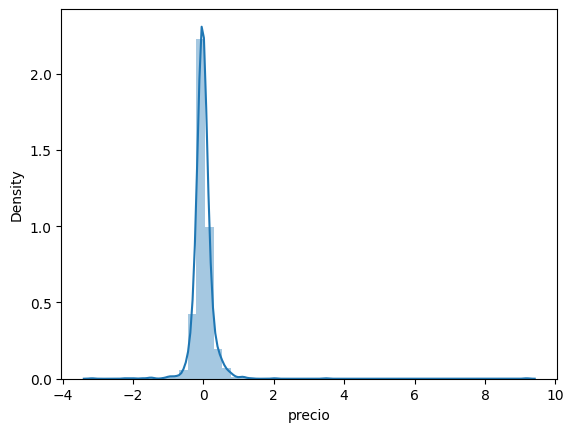

In [ ]:
sns.distplot((y_test - lgb_pred));
plt.show()